# Natural Language Processing (NLP)

## Data Science Unit 4 Sprint 1 Assignment 1

### ***Initial Data Exploration***

In [ ]:
%pwd

In [2]:
import pandas as pd

url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/master/module1-text-data/data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)
print(shops.shape)
shops.head()

(7616, 3)


,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [17]:
shops['star_rating'].value_counts()

5.0    3780
4.0    2360
3.0    738 
2.0    460 
1.0    278 
Name: star_rating, dtype: int64

In [4]:
pd.set_option('display.max_rows', 10)
shops['coffee_shop_name'].value_counts()

Epoch Coffee                            400
Halcyon                                 300
The Factory - Cafe With a Soul          244
Venezia Italian Gelato                  200
Houndstooth Coffee                      200
                                       ... 
Lucky Lab Coffee                         25
Sister Coffee                            17
Kowabunga Coffee                         16
The Marvelous Vintage Tea Party Co.      10
Lola Savannah Coffee Downtown             4
Name: coffee_shop_name, Length: 79, dtype: int64

### ***Cleaning the data to prep for NPL***

In [5]:
# Removed date from full_review_text and put the date in it's own column

pd.set_option('display.max_colwidth', 0)
shops['full_review_date'] = shops['full_review_text'].str[:11]
shops['full_review_text']= shops['full_review_text'].str[11:]

In [6]:
shops.head()

,coffee_shop_name,full_review_text,star_rating,full_review_date
0,The Factory - Cafe With a Soul,"1 check-in Love love loved the atmosphere! Every corner of the coffee shop had its own style, and there were swings!!! I ordered the matcha latte, and it was muy fantastico! Ordering and getting my drink were pretty streamlined. I ordered on an iPad, which included all beverage selections that ranged from coffee to wine, desired level of sweetness, and a checkout system. I got my latte within minutes! I was hoping for a typical heart or feather on my latte, but found myself listing out all the possibilities of what the art may be. Any ideas?",5.0 star rating,11/25/2016
1,The Factory - Cafe With a Soul,"Listed in Date Night: Austin, Ambiance in Austin BEAUTIFUL!!!! Love the ambiance! Instagram-worthy!!! Definitely $$$, so be prepared. This is gonna cost you a pretty penny :) Waffle dessert was just decent...nothing to rave about. But, will probably be back just to be somewhere unique and nice.",4.0 star rating,12/2/2016
2,The Factory - Cafe With a Soul,"1 check-in Listed in Brunch Spots I loved the eclectic and homey plush decor and who doesn't want to swing and drink their coffee? I would categorize this as a pricier coffee place but, to me it was worth it. After Thanksgiving nobody wants to make brunch so we headed out in search of chicken and waffles. There is ample parking in the private lot and ordering is done through I-Pads. Pick a seat and they will call your name when your items are ready. Be patient because some of the coffee drinks take longer than others. I had the cold brew coffee, chicken and waffles and we shared a pop+art! The po+art was strawberry; light and fluffy on the outside and gooey sweet filling on the inside. The chicken and waffles wasn't the standard so expect different, complex and interesting flavors from the accompanying slaw and sauce. I thoroughly enjoyed it but, the waffle was a bit bland and maybe could have used a bit of honey to spruce it up. The coffee here is spot on and I hear that their hot chocolate is the bomb but, I will have to wait for the weather to cool off to try that. A great place to be cozy and chat with your friends, a date or read a book. Chicken and waffles Pop tart Coffee See all photos from Carmela S. for The Factory - Cafe With a Soul",4.0 star rating,11/30/2016
3,The Factory - Cafe With a Soul,Very cool decor! Good drinks Nice seating However... Just about everything is overpriced. $1.50 extra for 3 ounces of Almond Milk in a cortado. No WiFi Music is a bit loud and the mix is odd. Pleasant French oldies followed by loud techno. Several tables were dirty when we got there. Service is average. It feels like a Los Angeles coffee shot that is out of place.,2.0 star rating,11/25/2016
4,The Factory - Cafe With a Soul,"1 check-in They are located within the Northcross mall shopping center facing east toward Burnet Rd with plenty of parking. I loved their computerized user friendly ordering system, it made it easy me to pick & choose all the items I wanted to try. I ordered pop tart, chicken & waffles, strawberry waffles (photos uploaded). This place is ideal for ordering a few dishes to share with your group. Seating is limited since this place is fairly new with lots of visitors. Arrive early and be prepared to wait a bit if you with a large grop. Store front facing Burnet Rd See all photos from Michelle A. for The Factory - Cafe With a Soul",4.0 star rating,12/3/2016


In [7]:
# Remove the words "star rating" from the star_rating column, change type to int/float.

shops['star_rating'] = shops['star_rating'].str[:5]
shops["star_rating"] = shops.star_rating.astype(float)
shops.head()

,coffee_shop_name,full_review_text,star_rating,full_review_date
0,The Factory - Cafe With a Soul,"1 check-in Love love loved the atmosphere! Every corner of the coffee shop had its own style, and there were swings!!! I ordered the matcha latte, and it was muy fantastico! Ordering and getting my drink were pretty streamlined. I ordered on an iPad, which included all beverage selections that ranged from coffee to wine, desired level of sweetness, and a checkout system. I got my latte within minutes! I was hoping for a typical heart or feather on my latte, but found myself listing out all the possibilities of what the art may be. Any ideas?",5.0,11/25/2016
1,The Factory - Cafe With a Soul,"Listed in Date Night: Austin, Ambiance in Austin BEAUTIFUL!!!! Love the ambiance! Instagram-worthy!!! Definitely $$$, so be prepared. This is gonna cost you a pretty penny :) Waffle dessert was just decent...nothing to rave about. But, will probably be back just to be somewhere unique and nice.",4.0,12/2/2016
2,The Factory - Cafe With a Soul,"1 check-in Listed in Brunch Spots I loved the eclectic and homey plush decor and who doesn't want to swing and drink their coffee? I would categorize this as a pricier coffee place but, to me it was worth it. After Thanksgiving nobody wants to make brunch so we headed out in search of chicken and waffles. There is ample parking in the private lot and ordering is done through I-Pads. Pick a seat and they will call your name when your items are ready. Be patient because some of the coffee drinks take longer than others. I had the cold brew coffee, chicken and waffles and we shared a pop+art! The po+art was strawberry; light and fluffy on the outside and gooey sweet filling on the inside. The chicken and waffles wasn't the standard so expect different, complex and interesting flavors from the accompanying slaw and sauce. I thoroughly enjoyed it but, the waffle was a bit bland and maybe could have used a bit of honey to spruce it up. The coffee here is spot on and I hear that their hot chocolate is the bomb but, I will have to wait for the weather to cool off to try that. A great place to be cozy and chat with your friends, a date or read a book. Chicken and waffles Pop tart Coffee See all photos from Carmela S. for The Factory - Cafe With a Soul",4.0,11/30/2016
3,The Factory - Cafe With a Soul,Very cool decor! Good drinks Nice seating However... Just about everything is overpriced. $1.50 extra for 3 ounces of Almond Milk in a cortado. No WiFi Music is a bit loud and the mix is odd. Pleasant French oldies followed by loud techno. Several tables were dirty when we got there. Service is average. It feels like a Los Angeles coffee shot that is out of place.,2.0,11/25/2016
4,The Factory - Cafe With a Soul,"1 check-in They are located within the Northcross mall shopping center facing east toward Burnet Rd with plenty of parking. I loved their computerized user friendly ordering system, it made it easy me to pick & choose all the items I wanted to try. I ordered pop tart, chicken & waffles, strawberry waffles (photos uploaded). This place is ideal for ordering a few dishes to share with your group. Seating is limited since this place is fairly new with lots of visitors. Arrive early and be prepared to wait a bit if you with a large grop. Store front facing Burnet Rd See all photos from Michelle A. for The Factory - Cafe With a Soul",4.0,12/3/2016


### ***Tokenizing full review text***

In [8]:
def tokenize(text):
    """Parses a string into a list of semantic units (words)

    Args:
        text (str): The string that the function will tokenize.

    Returns:
        list: tokens parsed out by the mechanics of your choice
    """
    
    tokens = re.sub(r'[^a-zA-Z ^0-9]', '', text)
    tokens = tokens.lower().split()
    
    return tokens


In [9]:
"""
Import Statements
"""

# Base
from collections import Counter
import re
 
import pandas as pd

# Plotting
import squarify
import matplotlib.pyplot as plt
import seaborn as sns

# NLP Libraries
import spacy
from spacy.tokenizer import Tokenizer
from nltk.stem import PorterStemmer

nlp = spacy.load("en_core_web_lg")

In [10]:
shops.head(2)

,coffee_shop_name,full_review_text,star_rating,full_review_date
0,The Factory - Cafe With a Soul,"1 check-in Love love loved the atmosphere! Every corner of the coffee shop had its own style, and there were swings!!! I ordered the matcha latte, and it was muy fantastico! Ordering and getting my drink were pretty streamlined. I ordered on an iPad, which included all beverage selections that ranged from coffee to wine, desired level of sweetness, and a checkout system. I got my latte within minutes! I was hoping for a typical heart or feather on my latte, but found myself listing out all the possibilities of what the art may be. Any ideas?",5.0,11/25/2016
1,The Factory - Cafe With a Soul,"Listed in Date Night: Austin, Ambiance in Austin BEAUTIFUL!!!! Love the ambiance! Instagram-worthy!!! Definitely $$$, so be prepared. This is gonna cost you a pretty penny :) Waffle dessert was just decent...nothing to rave about. But, will probably be back just to be somewhere unique and nice.",4.0,12/2/2016


In [11]:
pd.set_option('display.max_colwidth', 0)
shops[['coffee_shop_name','full_review_text']].sample(20)

,coffee_shop_name,full_review_text
2986,Thunderbird Coffee,"1 check-in Really liked this place -- definitely see myself coming back again. I'm not a coffee connoisseur or anything, but their cappuccino is the best I've had in a while. I love that they have multiple entrances, along with gigantic windows. Good place to spend all day at without bearing the guilt that you're wasting away the free sunlight! Their windows make it possible to be productive and enjoy a pretty day when it's not possible to sit outside. They've got a decent sized patio space--which I'm quite excited about come April or the early summertime. The service was quick, and the staff seems to be active in keeping the place clean which is a plus! They seemed very friendly and welcoming so no complaints there. Parking wasn't bad at all. The guy before me took the last spot in their lot so I resorted to street parking but it didn't take long. Was able to find a really good spot in no time. Now, for the two reasons that knocked off the fifth star that I would've given them: 1) the music was really loud at times (most of the time). I was there to converse and it was really hard to hear myself, let alone my company. 2) at 7pm on a Sunday, there was limited seatings. I wish they would add a few more tables or chairs. Plus, I think I witnessed a lighter than usual crowd since it is the Sunday before spring break ends. This was my first non-Starbucks coffee house visit in Austin. I'll be exploring other locations and will be comparing them to this. So far, I like Thunderbird a lot cause I don't feel the heavy presence of the elitist hipster culture here."
2029,The Factory - Cafe With a Soul,"This place is so cute. New favorite coffee spot on Burnet/in Northcross. Almost wish I was still in grad school, so I would have an excuse to be there everyday. Amazing coffee and best chicken & waffles ever! The chicken was seasoned perfectly and made for a delicious savory brunch (with the house made slaw they give you on the side). The olive oil cake was also awesome, light and sweet. Perfect coffee companion. My husband and I will definitely be back, as we loved everything and felt it was all very reasonable priced. Olive oil cake, chicken & waffle and 15-minutes-of-fame coffee! So good."
5936,Kick Butt Coffee Music & Booze,"2 check-ins Love this place! If I lived closer, I'd be here more often. But when I'm in the neighborhood, like getting my car serviced at Subaru, I always make it by. This morning I had the Yummy Chef breakfast taco. What is in that spicy salsa? Wow, that is delicious and so fresh! My chai tea latte was delish, of course, and the people friendly."
7131,Café Java,"7 check-ins Busy! almost always - be prepared to wait on the weekends. Free wifi Excellent coffee and espresso beverages coffee for sale, whole bean home made baked goods and desserts Great service, most the time. I've only eaten there for lunch and breakfast, but they are open some nights for dinner. Well known for their migas, refried beans and ranchero sauce. My fav taco here is potato (hashbrown shreds!), cheese, beans and bacon w/ a side of ranchero. I want to eat that ranchero sauce on just about everything. the hamburger omelet is just what it sounds like and so good. Also, they have peanut butter syrup, so I often get a chocolate peanut butter mocha - so freaking good."
2512,Caffé Medici,"This location has more of a cold atmosphere to it, for sure. I work in a cold office environment already and would love an escape wen I sneak away for some caffeine. The quality of the brew is just as good as the other location, and I understand it's in an industrial building and not an old house like the Clarksville location, but I'm a bit sad that I can't tuck away in it and feel cozy. I do like all the natural light. On a side note, the inside reminds me sooo much of my days spent in Insomnia on the drag in high school and college. It's the less dingy, smoke free, and friendlier version of the same flo

In [12]:
# pd.set_option('display.max_rows', 79) Used this to see if there were any coffee shop names spelled differently 
shops.coffee_shop_name.value_counts().to_frame()

,coffee_shop_name
Epoch Coffee,400
Halcyon,300
The Factory - Cafe With a Soul,244
Venezia Italian Gelato,200
Houndstooth Coffee,200
...,...
Lucky Lab Coffee,25
Sister Coffee,17
Kowabunga Coffee,16
The Marvelous Vintage Tea Party Co.,10


In [15]:
# How can we count the raw text?
shops['full_review_text'].value_counts()[:50]

 1 check-in Note: Do not come here if you're looking for a place to work remotely! There is no WiFi and no outlets. Staff says they are hoping to create an environment where people socialize and enjoy each other's company rather than being on their phones.  For a spot to catch up with friends over coffee and pastries, I highly recommend coming here! There is ample seating, an open layout, and a lot to look at  and talk about including wooden swings, books and a chess board on a table, and a cute corner of pillows in another corner.  They serve coffee drinks, waffles, and pastries. The pop tart was extremely sweet, so much so that I was unable to finish even half. Their cortado was pretty good. The food and drinks are quite pricey here, which makes me question returning.  Presentation and ambience wise, I give this place 5 stars! But price and food, probably a 3.                                                                                                                              

In [18]:
shops['tokens'] = shops['full_review_text'].apply(tokenize)

In [19]:
shops['tokens'].head()

0    [1, checkin, love, love, loved, the, atmosphere, every, corner, of, the, coffee, shop, had, its, own, style, and, there, were, swings, i, ordered, the, matcha, latte, and, it, was, muy, fantastico, ordering, and, getting, my, drink, were, pretty, streamlined, i, ordered, on, an, ipad, which, included, all, beverage, selections, that, ranged, from, coffee, to, wine, desired, level, of, sweetness, and, a, checkout, system, i, got, my, latte, within, minutes, i, was, hoping, for, a, typical, heart, or, feather, on, my, latte, but, found, myself, listing, out, all, the, possibilities, of, what, the, art, may, be, any, ideas]                              
1    [listed, in, date, night, austin, ambiance, in, austin, beautiful, love, the, ambiance, instagramworthy, definitely, so, be, prepared, this, is, gonna, cost, you, a, pretty, penny, waffle, dessert, was, just, decentnothing, to, rave, about, but, will, probably, be, back, just, to, be, somewhere, unique, and, nice]                

In [21]:
# Object from Base Python
from collections import Counter

# The object `Counter` takes an iterable, but you can instaniate an empty one and update it. 
word_counts = Counter()

# Update it based on a split of each of our documents
shops['tokens'].apply(lambda x: word_counts.update(x))

# Print out the 10 most common words
word_counts.most_common(10)

[('the', 34754),
 ('and', 26650),
 ('a', 22746),
 ('i', 20097),
 ('to', 17163),
 ('of', 12600),
 ('is', 12000),
 ('coffee', 10344),
 ('was', 9705),
 ('in', 9542)]

### Borrowed function from lecture which takes a corpus of reviews and returns a dataframe of word counts for me to analyze.

In [23]:
def count(docs):

    word_counts = Counter()
    appears_in = Counter()

    total_docs = len(docs)

    for doc in docs:
        word_counts.update(doc)
        appears_in.update(set(doc))

    temp = zip(word_counts.keys(), word_counts.values())

    wc = pd.DataFrame(temp, columns = ['word', 'count'])

    wc['rank'] = wc['count'].rank(method='first', ascending=False)
    total = wc['count'].sum()

    wc['pct_total'] = wc['count'].apply(lambda x: x / total)

    wc = wc.sort_values(by='rank')
    wc['cul_pct_total'] = wc['pct_total'].cumsum()

    t2 = zip(appears_in.keys(), appears_in.values())
    ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
    wc = ac.merge(wc, on='word')

    wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)

    return wc.sort_values(by='rank')

In [25]:
# Test to make sure function works
wc = count(shops['tokens'])
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
36,the,6844,34754,1.0,0.044946,0.044946,0.898634
43,and,6864,26650,2.0,0.034466,0.079412,0.901261
58,a,6244,22746,3.0,0.029417,0.108829,0.819853
35,i,5505,20097,4.0,0.025991,0.134820,0.722820
8,to,5653,17163,5.0,0.022196,0.157016,0.742253


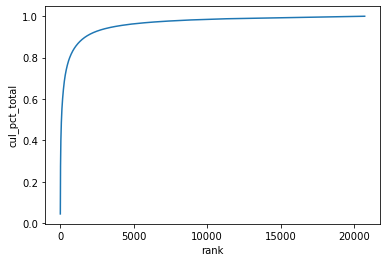

In [26]:
# Visualize the distribution of the tokens by rank and cumulative percentage total using seaborn

import seaborn as sns

# Cumulative Distribution Plot
sns.lineplot(x='rank', y='cul_pct_total', data=wc);

In [27]:
wc[wc['rank'] <= 200]['cul_pct_total'].max()

0.638046537132452

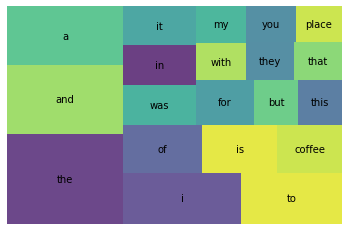

In [28]:
# Word cloud before removing stop words

import squarify
import matplotlib.pyplot as plt

wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()